In [ ]:
import numpy as np
import mne 
from mne.preprocessing import ICA 
from mne.time_frequency import tfr_morlet
import scipy.io as scio

### Step1 读数据

In [ ]:
ch_names = ['Fpz','Fp1','Fp2','AF3','AF4','AF7','AF8','Fz','F1','F2','F3','F4','F5','F6','F7','F8','FCz','FC1','FC2','FC3','FC4','FC5','FC6','FT7','FT8','Cz','C1','C2','C3','C4','C5','C6','T7','T8','CP1','CP2','CP3','CP4','CP5','CP6','TP7','TP8','Pz','P3','P4','P5','P6','P7','P8','POz',
            'PO3','PO4','PO5','PO6','PO7','PO8','Oz','O1','O2','ECG','HEOR','HEOL','VEOU','VEOL']
ch_types = ['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg',
            'eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg',
            'eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg',
            'eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg',
            'eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg',
            'eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','ecg',
            'misc','misc','misc','misc'
]

sfreq = 1000
info = mne.create_info(
        ch_names=ch_names,
        ch_types=ch_types,
        sfreq=1000
)
info.set_montage('standard_1020')

In [ ]:
# 公开数据集
# data_path = r'D:\DATA\BCI Competition IV dataset 2a\A01T.mat'
# structured_data = scio.loadmat(data_path)
# eeg_data = structured_data['data'][0, 4]['X'].item().transpose((1, 0))

#课题室数据集
path = r'D:\DATA\脑电数据\5.17脑电数据\郑力文\EEG.mat'
EEG = scio.loadmat(path)
eeg_data = EEG['EEG']['data'].item()


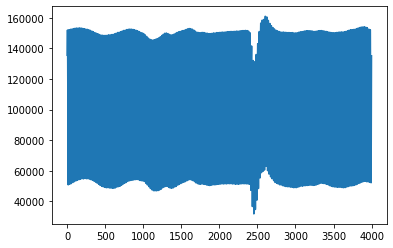

In [58]:
import matplotlib.pyplot as plt
plt.plot(eeg_data[62][:4000])

Creating RawArray with float64 data, n_channels=64, n_times=1418000
    Range : 0 ... 1417999 =      0.000 ...  1417.999 secs
Ready.
Opening raw-browser...


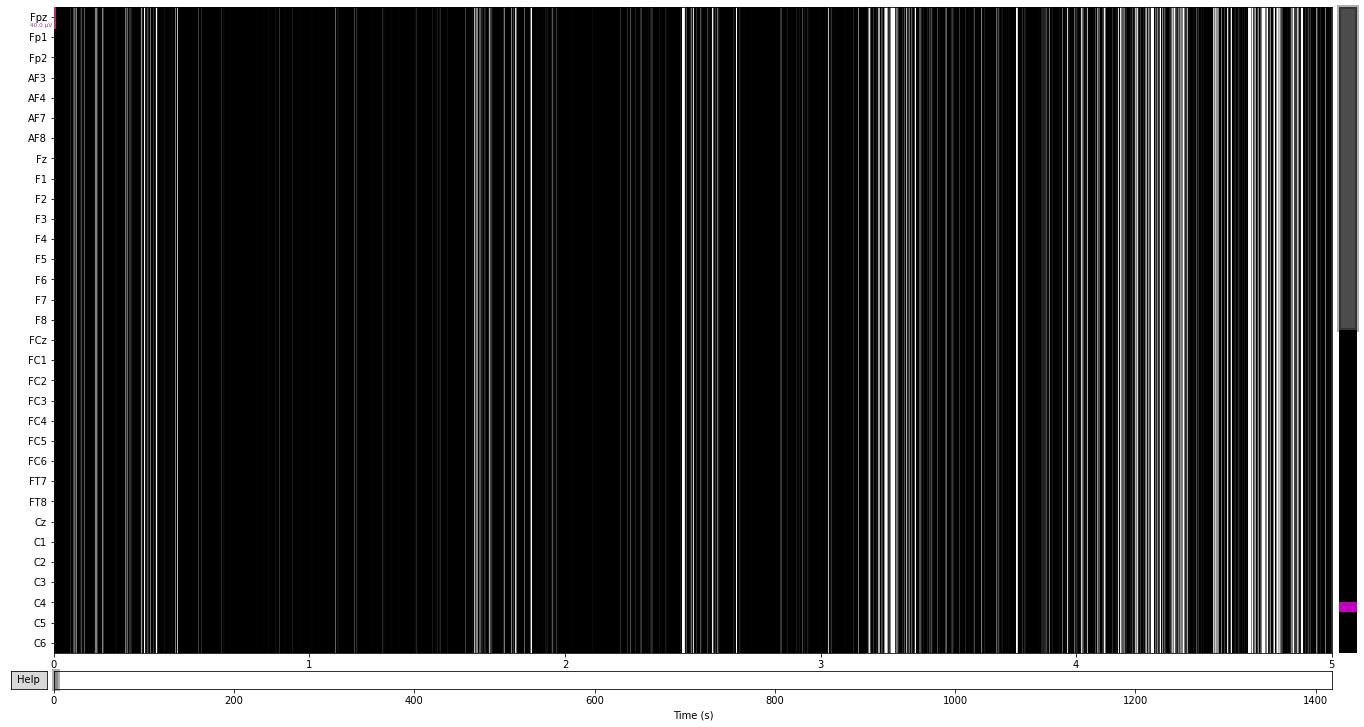

Effective window size : 2.048 (s)


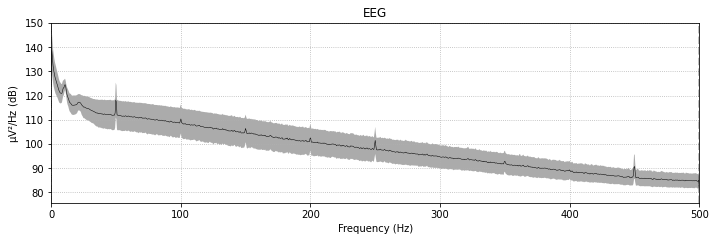

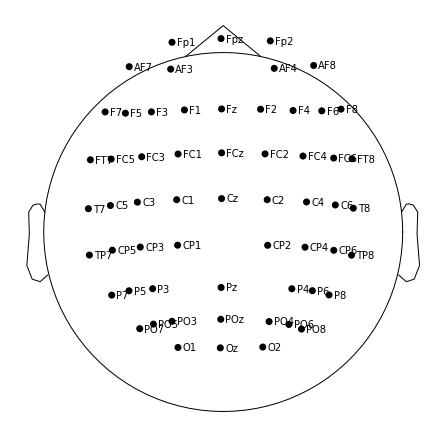

Effective window size : 2.048 (s)


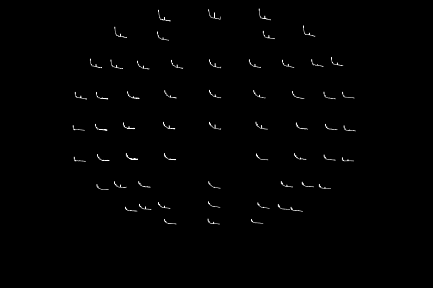

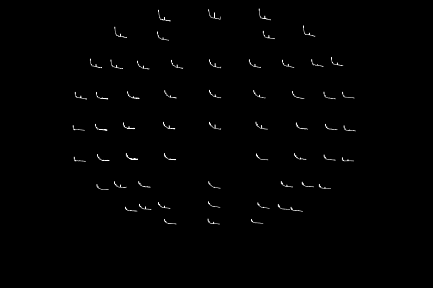

In [39]:
raw = mne.io.RawArray(data=eeg_data, info=info)
raw.plot(duration=5, n_channels=32, clipping=None)
raw.plot_psd(average=True)
raw.plot_sensors(ch_type='eeg', show_names=True)
raw.plot_psd_topo()

### Step2 滤波

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)

Effective window size : 2.048 (s)


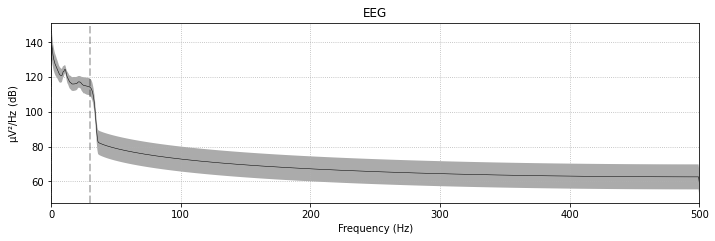

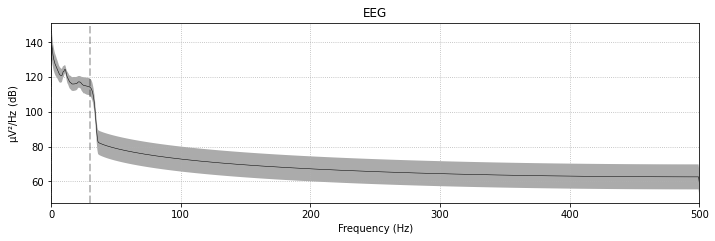

In [41]:
raw = raw.filter(l_freq=0.1, h_freq=30, method='fir')   #method='iir
raw.plot_psd(average=True)

### Step3 去伪迹

Opening raw-browser...


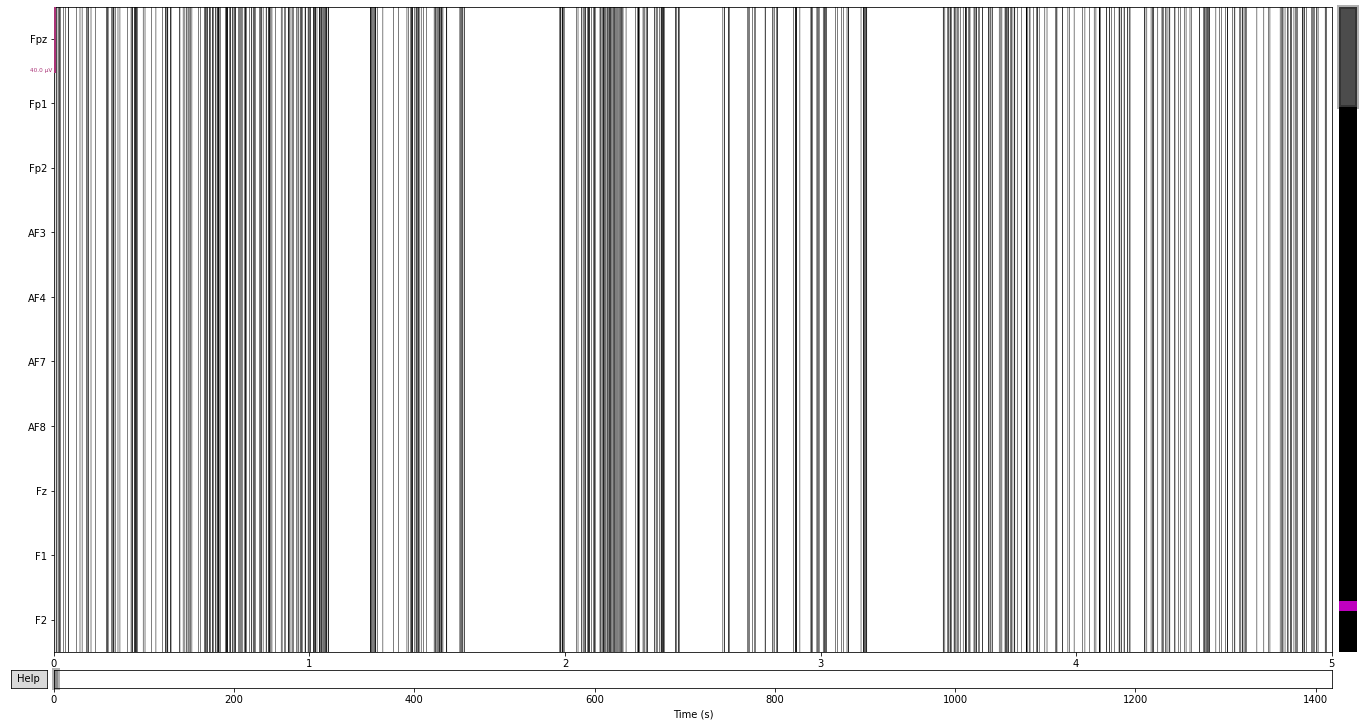

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\mne\viz\utils.py:120: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
C:\Users\dell\AppData\Local\Temp\ipykernel_20236\1161560294.py:3: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw = raw.interpolate_bads()


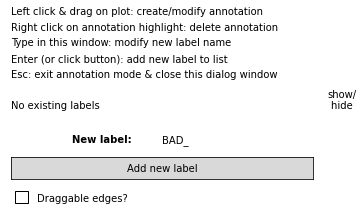

In [43]:
fig = raw.plot(duration=5, n_channels=10, clipping=None)
fig.canvas.key_press_event('a')
raw = raw.interpolate_bads()

In [46]:
ica = ICA(max_iter='auto')
raw_for_ica = raw.copy().filter(l_freq=1, h_freq=None)
ica.fit(raw_for_ica)
ica.plot_sources(raw_for_ica)
ica.plot_components()
ica.plot_overlay(raw_for_ica, exclude=[1])

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33001 samples (33.001 sec)

Fitting ICA to data using 59 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 59 components
Fitting ICA took 351.2s.


Method,fastica
Fit,117 iterations on raw data (1418000 samples)
ICA components,59
Explained variance,100.0 %
Available PCA components,59
Channel types,eeg
ICA components marked for exclusion,—


In [60]:
eval(input('输入拒绝的成分：'))

0